In [277]:
import numpy as np
from numpy import pi, cos
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (15, 12)

In [278]:
def coupled_modes(t, initial_condition, u1, u2, u3, w, w1, w2, w3, b11, b22, b13, b23, P, epsilon):
    y1, y2, y3, z1, z2, z3 = initial_condition
    
    dy1 = z1
    dz1 = -w1**2*y1 - epsilon*(b13*y1*y3 + 2*u1*z1)
    dy2 = z2
    dz2 = -w2**2*y2 - epsilon*(b23*y2*y3 + 2*u2*z2)
    dy3 = z3
    dz3 = -w3**2*y3 - epsilon*(b11*y1**2 + b22*y2**2 + 2*u3*z3 - P*cos(w*t))
    
    return [dy1, dy2, dy3, dz1, dz2, dz3]

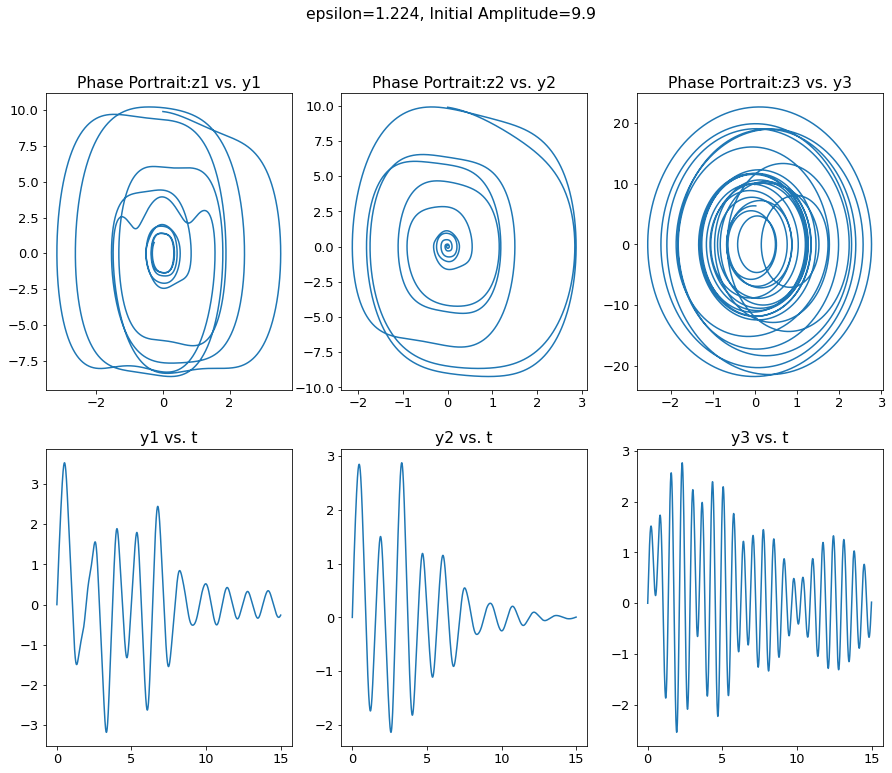

In [304]:
# Set parameters and initial condition

# Damping
u1 = .1
u2 = .2
u3 = .1

# Mode frequencies
w1 = 4
w2 = 4.09
w3 = 8.1


# Quadratic coefficients
b11 = -3
b22 = -4
b13 = -7
b23 = -5

# Nonlinearity strength
epsilon = 1.224

# Forcing freq
s = 1
w = w3 + epsilon*s

#Forcing amplitude
P = 16

parameters = (u1, u2, u3, w, w1, w2, w3, b11, b22, b13, b23, P, epsilon)


# Initial condition
A = 9.9
initial_condition = [0, 0, 0, A, A, A]  # [velocity, acceleration]

# Run ODE solver
T = 15
t_span = (0, T)
t = np.arange(0, T, 0.001)

result = solve_ivp(coupled_modes, t_span, initial_condition, args=parameters, t_eval = t)


for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.plot(result.y[i, :],
             result.y[i+3, :])
    plt.title(f'Phase Portrait:z{i+1} vs. y{i+1}')
    
    plt.subplot(2, 3, i+4)
    plt.plot(t,
             result.y[i, :])
    plt.title(f'y{i+1} vs. t')
    
plt.suptitle(f'epsilon={epsilon}, Initial Amplitude={A}')    
plt.rc('font', size=13)     